In [106]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [107]:
date = '20211202'
dataNo = 4
scanNo = 4

In [108]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [109]:
param = 'A0144: LS final amplitude 1'
scan_param = scan_data[param]

In [110]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [111]:
sample1 = -8
sample2 = 2
sample3 = 8
unit = '[V]'

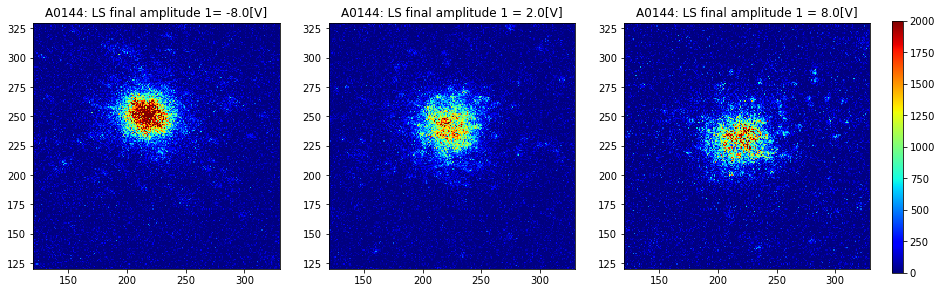

In [112]:
vmax = 2000
vmin = 0
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave


img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

fig =plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto',cmap="jet")
ax1.set_aspect('equal')
ax1.set_xlim(120,330)
ax1.set_ylim(120,330)
ax1.set_title(param+"= %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(1,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto',cmap="jet")
ax2.set_aspect('equal')
ax2.set_xlim(120,330)
ax2.set_ylim(120,330)
ax2.set_title(param+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(1,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto',cmap="jet")
ax3.set_aspect('equal')
ax3.set_xlim(120,330)
ax3.set_ylim(120,330)
ax3.set_title(param+" = %.01f"%(sample3)+unit)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(mappable,cax=cbar_ax)
plt.show()

a1= 0.013417786796477657
b1= 223.8528633860811
c1= 40.397664049606824
d= 0.0006262588412429295
$\delta$c1= 0.7387538413420496


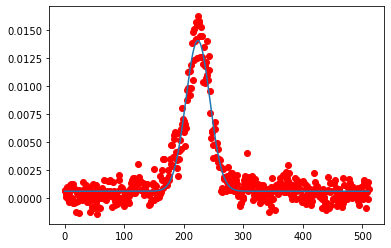

In [113]:
# wx_list = []
# wy_list = []
# for N in range(len(trans_files)):
#     nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
#     ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
N=15
x_list =np.arange(np.shape(img_trans_list[0])[0])
nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
CoMy = []
CoMx = []

for i in range(len(nx)):
    CoMx += [i*nx[i]]
for i in range(len(ny)):
    CoMy += [i*ny[i]]
CoMx = np.sum(CoMx)
CoMy = np.sum(CoMy)
para_ini=[np.max(nx), CoMx,100, np.mean(nx[0:5])]
def nonlinear_fit(x,a1,b1,c1,d):
    return a1*np.exp(-2*(x-b1)**2/c1**2)+d
param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
list_x1=x_list
list_y1=[]
for num in list_x1:
    list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3])

perr=np.sqrt(np.diag(cov))
print("a1=",str(param[0]))
print("b1=",str(param[1]))
print("c1=",str(param[2]))
print("d=",str(param[3]))
print(r"$\delta$c1=",str(perr[2]))
plt.scatter(x_list,nx, label='Data',c="r")
plt.plot(x_list,list_y1)
# plt.legend()
# plt.xlim(120,330)

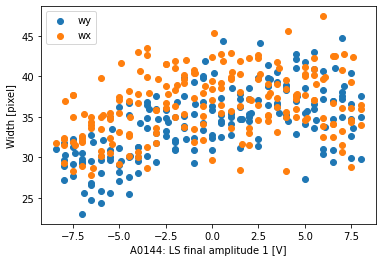

In [115]:
wx_list =[]
wy_list =[]
x_list =np.arange(np.shape(img_trans_list[0])[0])
y_list =np.arange(np.shape(img_trans_list[0])[1])
for N in range(len(trans_files)):
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    CoMy = []
    CoMx = []
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx = np.sum(CoMx)
    CoMy = np.sum(CoMy)
    para_ini=[np.max(nx), CoMx,20, np.mean(nx[0:5])]
    def nonlinear_fit(x,a1,b1,c1,d):
        return a1/c1*np.exp(-2*(x-b1)**2/c1**2)+d
    param, cov=scipy.optimize.curve_fit(nonlinear_fit,x_list,nx,para_ini)
    wx_list.append(param[2])
    para_ini=[np.max(ny), CoMy,20, np.mean(ny[0:5])]
    def nonlinear_fit(x,a1,b1,c1,d):
        return a1/c1*np.exp(-2*(x-b1)**2/c1**2)+d
    param, cov=scipy.optimize.curve_fit(nonlinear_fit,y_list,ny,para_ini)
    wy_list.append(param[2])
plt.scatter(scan_param,wy_list, label ='wy')
plt.scatter(scan_param,wx_list, label='wx')
# plt.ylim(8,25)
plt.xlabel('A0144: LS final amplitude 1 [V]')
plt.ylabel('Width [pixel]')
plt.legend()